# Tutorial 23: Dollar Neutral Portfolios

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5882%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0858%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1735%,-1.1238%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6403%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1449%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6615%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


## 2. Mean Risk Dollar Neutral Portfolios

다음 수식은 달러 중립 포트폴리오(dollar neutral portfolio)를 최적화하는 문제를 나타냅니다. 이 문제는 포트폴리오의 기대 수익률을 최대화하면서 몇 가지 제약 조건을 만족시키는 포트폴리오 가중치 $w$를 찾는 것입니다. 각 수식과 제약 조건을 자세히 설명하겠습니다.

### 목적 함수 (Objective Function)
$$
\max_w \, \mu w
$$
- **설명**: 이 목적 함수는 포트폴리오의 기대 수익률 $\mu w$를 최대화하려고 합니다.
- **$\mu$**: 자산의 기대 수익률 벡터.
- **$w$**: 자산의 포트폴리오 가중치 벡터.

### 제약 조건 (Constraints)
1. **달러 중립 조건 (Dollar Neutral Constraint)**:
   $$
   \sum_{i=1}^{N} w_i = 0
   $$
   - **설명**: 포트폴리오의 총 가중치가 0이 되어야 합니다. 이는 롱 포지션(positive weights)과 숏 포지션(negative weights)의 가치가 동일하다는 것을 의미합니다.

2. **위험 함수 제약 조건 (Risk Function Constraint)**:
   $$
   \phi(w) \leq \bar{\phi}
   $$
   - **설명**: $\phi(w)$는 포트폴리오의 위험을 측정하는 볼록 함수(convex function)입니다. 이 제약 조건은 포트폴리오의 위험이 상한선 $\bar{\phi}$를 초과하지 않도록 합니다.

3. **롱 포지션 상한선 (Upper Bound on Long Positions)**:
   $$
   \sum_{i=1}^{N} \max(w_i, 0) \leq W^L
   $$
   - **설명**: 이 제약 조건은 포트폴리오에서 롱 포지션의 총합이 상한선 $W^L$을 초과하지 않도록 합니다. $\max(w_i, 0)$는 $w_i$가 양수일 경우 그 값을, 음수일 경우 0을 반환합니다.

4. **숏 포지션 상한선 (Upper Bound on Short Positions)**:
   $$
   \sum_{i=1}^{N} -\min(w_i, 0) \leq W^S
   $$
   - **설명**: 이 제약 조건은 포트폴리오에서 숏 포지션의 총합이 상한선 $W^S$을 초과하지 않도록 합니다. $-\min(w_i, 0)$는 $w_i$가 음수일 경우 그 절대값을, 양수일 경우 0을 반환합니다.

5. **개별 자산 가중치 제약 조건 (Individual Asset Weight Constraints)**:
   $$
   W^S \leq w \leq W^L
   $$
   - **설명**: 각 자산의 가중치 $w_i$는 숏 포지션의 상한선 $W^S$과 롱 포지션의 상한선 $W^L$ 사이에 있어야 합니다. 이는 각 자산에 대해 허용된 최소 및 최대 가중치를 설정합니다.

### 요약
이 문제는 포트폴리오의 기대 수익률을 최대화하면서, 다음과 같은 제약 조건을 만족시키는 포트폴리오 가중치를 찾는 것입니다:
- 전체 포트폴리오 가중치의 합이 0이 되도록 합니다 (달러 중립).
- 포트폴리오의 위험이 주어진 상한선을 초과하지 않도록 합니다.
- 롱 포지션과 숏 포지션의 합이 각각 주어진 상한선을 초과하지 않도록 합니다.
- 각 자산의 가중치가 주어진 범위 내에 있도록 합니다.

이러한 제약 조건을 통해 포트폴리오의 리스크를 관리하면서 기대 수익률을 최대화할 수 있습니다.

## 3. Dollar Neutral Portfolio with a Constraint on Standard Deviation

### 3.1 Calculating Dollar Neutral Portfolio

In [4]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Market neutral constraints:

port.sht = True # Allows short positions
port.uppersht = 1 # Upper bound for sum of negative weights
port.upperlng = 1 # Upper bound for sum of positive weights
port.budget = 0 # Sum of all weights
port.upperdev = 0.20/252**0.5 # Upper bound for daily standard deviation

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman), FM (Factor Model)
                # or BL_FM (Black Litterman with Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MaxRet' # For Market Neutral the objective must be
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 3 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-25.2552%,11.0723%,0.0000%,-0.1802%,0.0000%,0.0000%,-0.0000%,3.3185%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-39.6163%,-23.0899%,-0.0000%,0.0000%,0.0000%,-3.3765%,-0.0000%,0.0000%


이 코드는 `riskfolio` 라이브러리를 사용하여 시장 중립(Market Neutral) 포트폴리오를 최적화하는 방법을 보여줍니다. 시장 중립 포트폴리오는 롱 포지션과 숏 포지션의 합이 0이 되는 포트폴리오로, 시장의 방향성에 영향을 받지 않도록 설계됩니다. 각 단계별로 코드의 설명을 드리겠습니다.

### 포트폴리오 객체 생성
1. **포트폴리오 객체 생성**:
   ```python
   port = rp.Portfolio(returns=Y)
   ```
   - `Y`: 자산의 역사적 수익률 데이터입니다. 이를 사용하여 `Portfolio` 객체를 생성합니다.

### 포트폴리오 통계 계산
2. **기대 수익률 및 공분산 행렬 추정**:
   ```python
   method_mu='hist'  # Method to estimate expected returns based on historical data.
   method_cov='hist'  # Method to estimate covariance matrix based on historical data.
   
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```
   - `method_mu='hist'`: 역사적 데이터를 기반으로 기대 수익률을 추정합니다.
   - `method_cov='hist'`: 역사적 데이터를 기반으로 공분산 행렬을 추정합니다.
   - `port.assets_stats` 함수는 지정된 방법에 따라 자산의 통계를 계산합니다.

### 시장 중립 제약 조건 설정
3. **시장 중립 제약 조건 설정**:
   ```python
   port.sht = True  # Allows short positions
   port.uppersht = 1  # Upper bound for sum of negative weights
   port.upperlng = 1  # Upper bound for sum of positive weights
   port.budget = 0  # Sum of all weights
   port.upperdev = 0.20/252**0.5  # Upper bound for daily standard deviation
   ```
   - `port.sht = True`: 숏 포지션을 허용합니다.
   - `port.uppersht = 1`: 숏 포지션의 총합이 1을 넘지 않도록 설정합니다.
   - `port.upperlng = 1`: 롱 포지션의 총합이 1을 넘지 않도록 설정합니다.
   - `port.budget = 0`: 모든 포트폴리오 가중치의 합이 0이 되도록 설정합니다. 이는 시장 중립 포트폴리오를 의미합니다.
   - `port.upperdev = 0.20/252**0.5`: 일간 표준편차의 상한선을 설정합니다. 연간 20% 변동성을 일간으로 변환합니다.

### 최적화 수행
4. **최적 포트폴리오 추정**:
   ```python
   model='Classic'  # Could be Classic (historical), BL (Black Litterman), FM (Factor Model)
                    # or BL_FM (Black Litterman with Factor Model)
   rm = 'MV'  # Risk measure used, this time will be variance
   obj = 'MaxRet'  # For Market Neutral the objective must be
   hist = True  # Use historical scenarios for risk measures that depend on scenarios
   rf = 0  # Risk free rate
   l = 3  # Risk aversion factor, only useful when obj is 'Utility'
   
   w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```
   - `model='Classic'`: 고전적인 역사적 데이터를 사용하는 모델을 사용합니다.
   - `rm = 'MV'`: 평균-분산을 위험 측정치로 사용합니다.
   - `obj = 'MaxRet'`: 시장 중립 포트폴리오의 경우, 최대 수익률을 목표로 합니다.
   - `hist = True`: 역사적 시나리오를 사용합니다.
   - `rf = 0`: 무위험 이자율을 0으로 설정합니다.
   - `l = 3`: 위험 회피 계수로, 유틸리티 함수에서만 사용됩니다.
   - `port.optimization` 함수는 설정된 모델, 위험 측정치, 목표 함수 등을 사용하여 최적 포트폴리오 가중치 벡터 `w`를 계산합니다.

### 결과 출력
5. **최적화 결과 출력**:
   ```python
   print("Sum weights : ", np.round(np.sum(w.to_numpy()), 4))
   display(w.T)
   ```
   - `np.round(np.sum(w.to_numpy()), 4)`: 최적화된 포트폴리오 가중치의 합을 계산하고, 소수점 네 자리까지 반올림하여 출력합니다.
   - `display(w.T)`: 최적화된 포트폴리오 가중치를 전치(transpose)하여 보기 좋게 출력합니다.

### 요약
이 코드는 `riskfolio` 라이브러리를 사용하여 시장 중립 포트폴리오를 최적화합니다. 시장 중립 포트폴리오는 롱 포지션과 숏 포지션의 합이 0이 되도록 설계됩니다. 제약 조건을 설정하고, 고전적 모델과 평균-분산 위험 측정치를 사용하여 최대 수익률을 목표로 최적화를 수행합니다. 최적화된 포트폴리오 가중치를 출력하여 결과를 확인할 수 있습니다.

### 3.2 Plotting portfolio composition

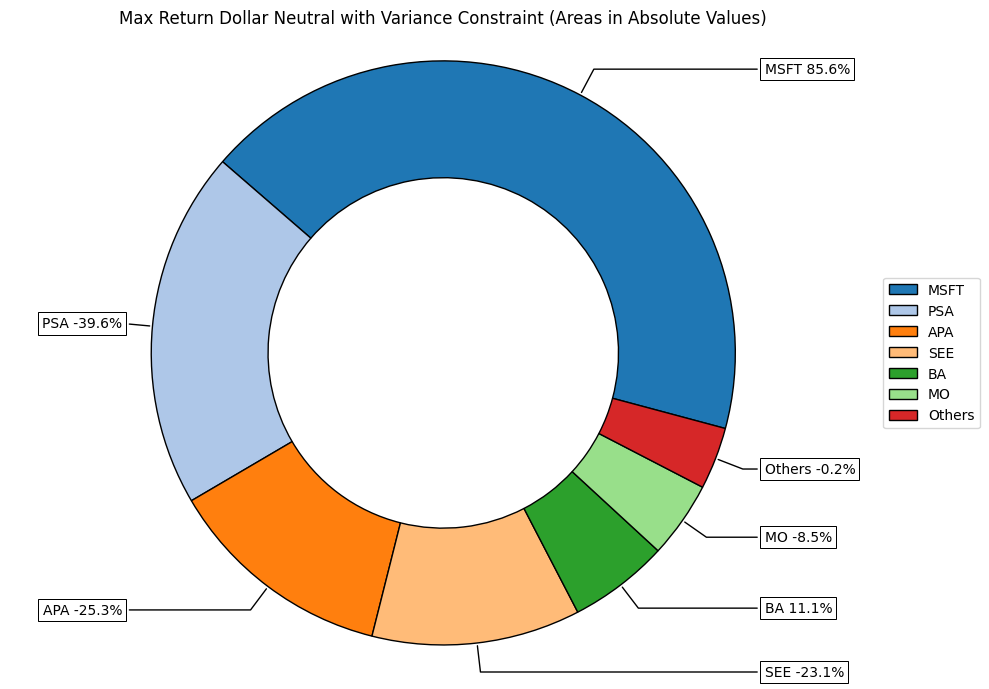

In [5]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with Variance Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

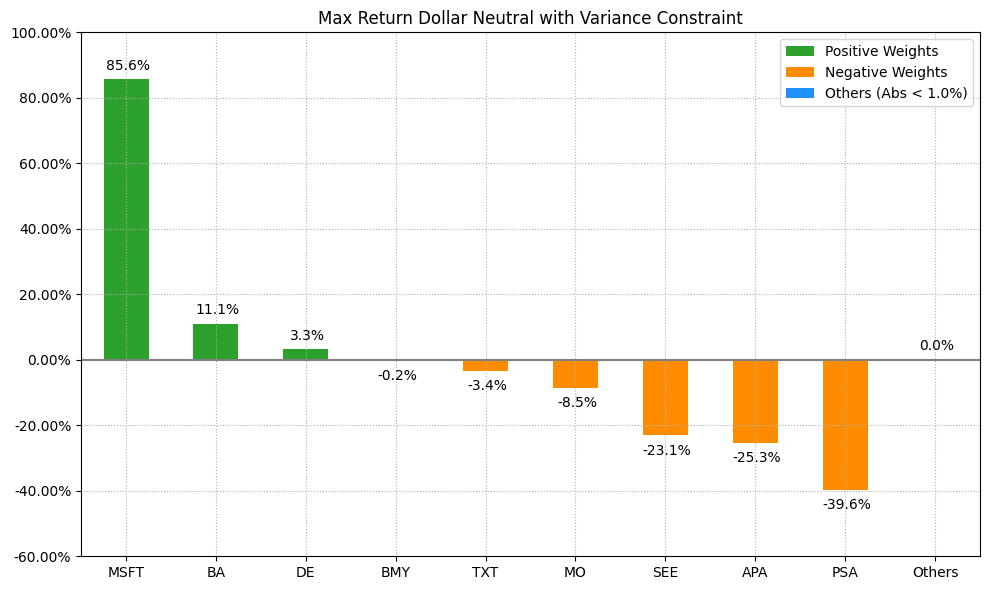

In [6]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with Variance Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 3.3 Calculating efficient frontier

In [7]:
points = 50 # Number of points of the frontier
port.upperdev = None # Deleting the upper bound for daily standard deviation

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
APA,0.0000%,-0.7347%,-1.4693%,-2.2040%,-2.9386%,-3.6735%,-4.4079%,-5.1426%,-5.8772%,-6.6119%,...,-78.6981%,-81.2198%,-83.6916%,-86.1195%,-88.5087%,-90.8632%,-93.1868%,-95.4824%,-97.7527%,-100.0000%
BA,0.0000%,0.9976%,1.9953%,2.9929%,3.9906%,4.9883%,5.9859%,6.9835%,7.9812%,8.9788%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.7380%,1.4759%,2.2139%,2.9519%,3.6899%,4.4278%,5.1658%,5.9038%,6.6418%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BMY,0.0000%,-1.0278%,-2.0557%,-3.0835%,-4.1114%,-5.1392%,-6.1670%,-7.1949%,-8.2227%,-9.2506%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
CMCSA,0.0000%,-0.1123%,-0.2247%,-0.3370%,-0.4494%,-0.5617%,-0.6740%,-0.7864%,-0.8987%,-1.0111%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.9013%,1.8027%,2.7040%,3.6053%,4.5068%,5.4080%,6.3093%,7.2107%,8.1120%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%,-0.0000%,0.0000%
CPB,0.0000%,-0.2936%,-0.5871%,-0.8807%,-1.1742%,-1.4679%,-1.7613%,-2.0549%,-2.3484%,-2.6420%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%
DE,0.0000%,0.7301%,1.4602%,2.1903%,2.9204%,3.6506%,4.3806%,5.1107%,5.8408%,6.5709%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
HPQ,0.0000%,-0.1320%,-0.2639%,-0.3959%,-0.5279%,-0.6597%,-0.7918%,-0.9237%,-1.0557%,-1.1877%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
JCI,0.0000%,-0.2465%,-0.4930%,-0.7394%,-0.9859%,-1.2325%,-1.4789%,-1.7254%,-1.9719%,-2.2183%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%


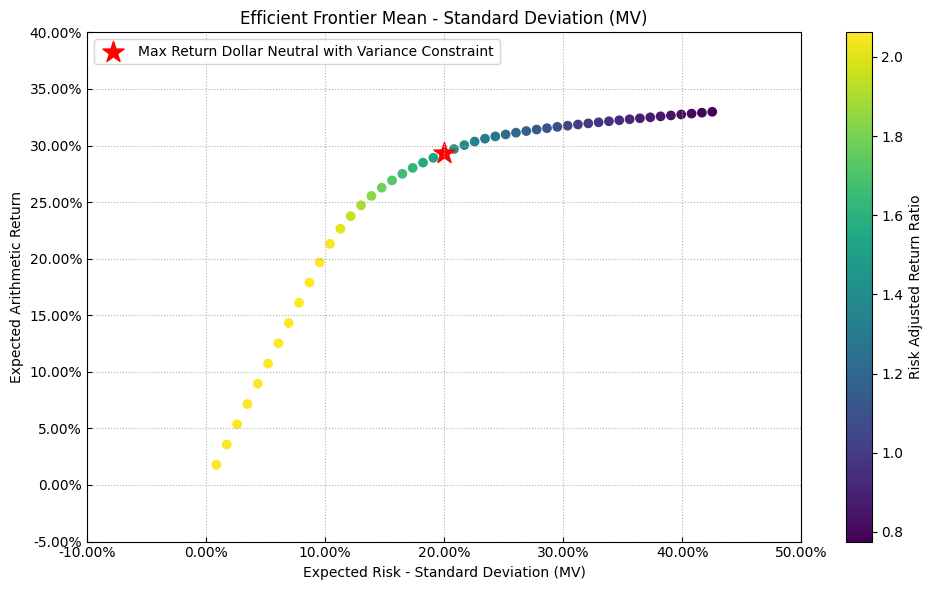

In [8]:
# Plotting the efficient frontier

label = "Max Return Dollar Neutral with Variance Constraint" # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

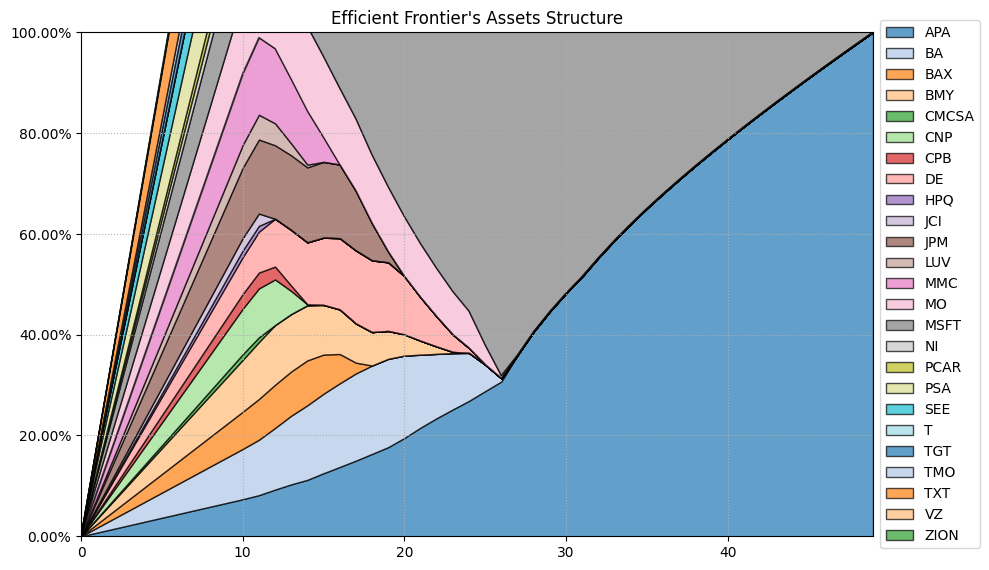

In [9]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)


## 4. Dollar Neutral Portfolio with a Constraint on CVaR

### 4.1 Calculating Dollar Neutral Portfolio

In [10]:
rm = 'CVaR' # Risk measure
port.upperCVaR = 0.40/252**0.5 # Creating an upper bound for daily CVaR

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

print("Sum weights : ", np.round(np.sum(w.to_numpy()),4))
display(w.T)

Sum weights :  -0.0


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,-20.6171%,9.9635%,0.0000%,-0.0000%,0.0000%,0.0000%,-0.0000%,12.1420%,0.0000%,-0.0000%,...,-0.0000%,0.0000%,-37.1884%,-21.6185%,-0.0000%,0.0000%,0.0000%,-13.6085%,-0.0000%,0.0000%


### 4.2 Plotting portfolio composition

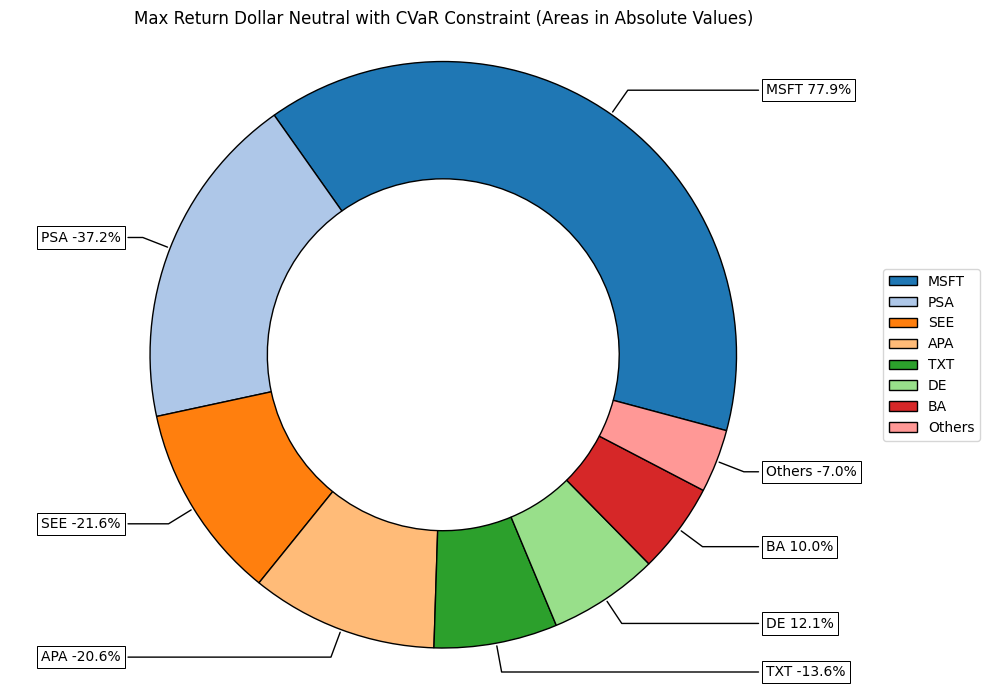

In [11]:
# Plotting the composition of the portfolio

title = "Max Return Dollar Neutral with CVaR Constraint"
ax = rp.plot_pie(w=w,
                 title=title,
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=7,
                 width=10,
                 ax=None)

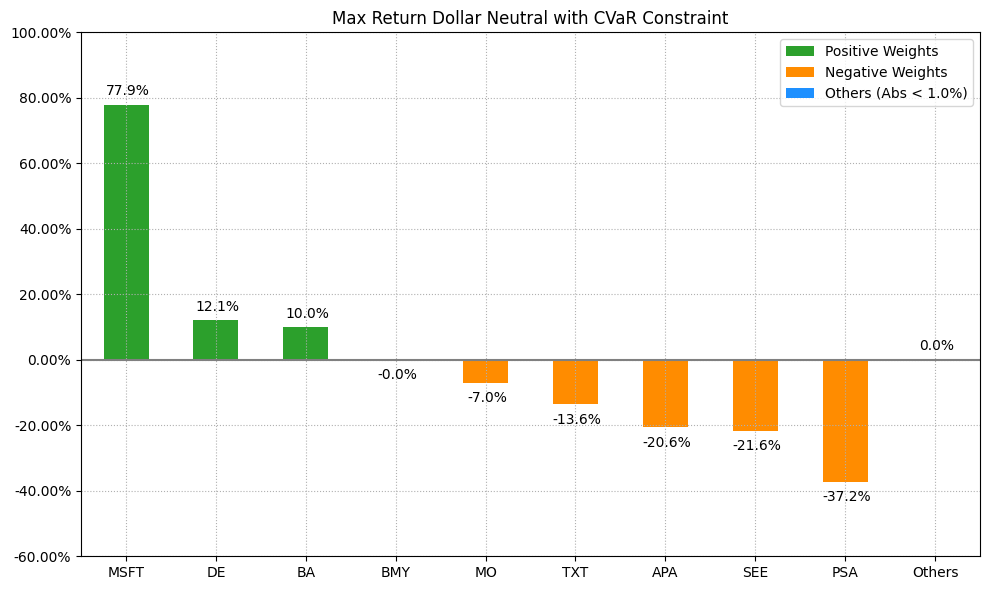

In [12]:
# Plotting the composition of the portfolio using bar chart

ax = rp.plot_bar(w,
                 title="Max Return Dollar Neutral with CVaR Constraint",
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10)

### 4.3 Calculate efficient frontier

In [13]:
points = 50 # Number of points of the frontier
port.upperCVaR = None # Deleting the upper bound for daily CVaR

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,-0.0000%,0.0000%,0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%,0.0000%,-0.0000%,-0.0000%,...,0.0000%,0.0000%,-0.0000%,-0.0000%,0.0000%,0.0000%,0.0000%,-0.0000%,-0.0000%,-0.0000%
1,-0.8005%,0.9880%,0.6534%,-2.2332%,-0.8300%,2.2411%,0.0745%,1.2035%,-0.4372%,-0.7076%,...,0.3500%,-0.1789%,-2.0114%,-1.5553%,0.9033%,0.9221%,1.7082%,-2.4101%,-0.2577%,0.4699%
2,-1.6011%,1.9760%,1.3069%,-4.4663%,-1.6600%,4.4822%,0.1490%,2.4069%,-0.8744%,-1.4153%,...,0.7001%,-0.3577%,-4.0229%,-3.1105%,1.8067%,1.8442%,3.4163%,-4.8202%,-0.5153%,0.9399%
3,-2.4016%,2.9639%,1.9603%,-6.6995%,-2.4900%,6.7233%,0.2234%,3.6104%,-1.3116%,-2.1229%,...,1.0501%,-0.5366%,-6.0343%,-4.6658%,2.7100%,2.7663%,5.1245%,-7.2303%,-0.7730%,1.4098%
4,-3.2021%,3.9519%,2.6138%,-8.9327%,-3.3199%,8.9644%,0.2979%,4.8139%,-1.7488%,-2.8305%,...,1.4002%,-0.7155%,-8.0458%,-6.2210%,3.6133%,3.6883%,6.8326%,-9.6403%,-1.0307%,1.8797%


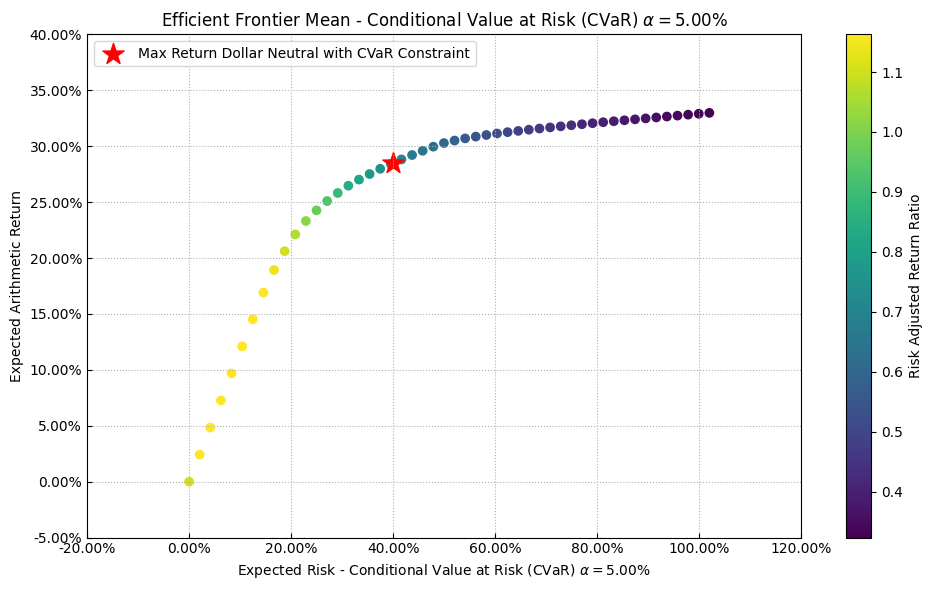

In [14]:
label = "Max Return Dollar Neutral with CVaR Constraint" # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

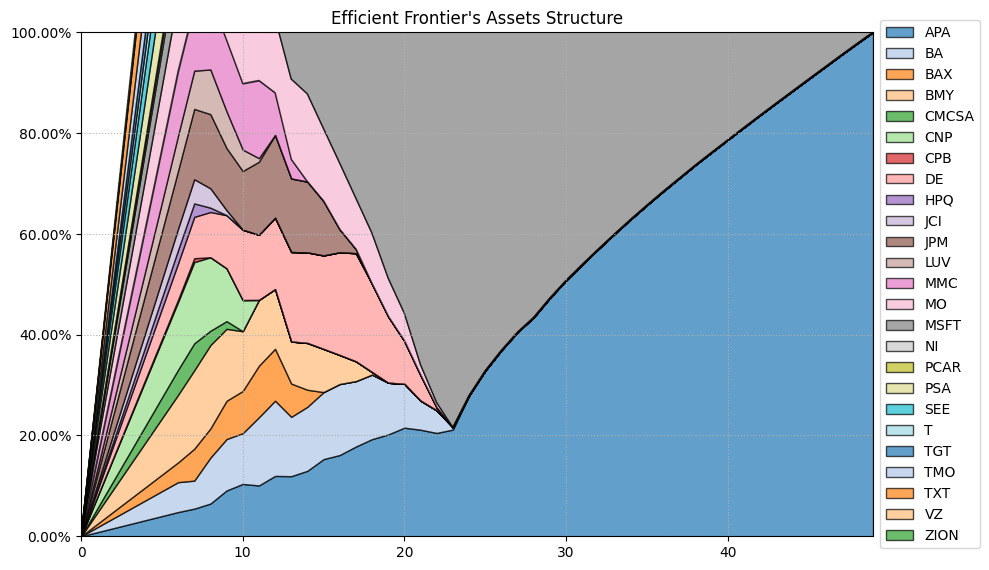

In [15]:
# Plotting efficient frontier composition in absolute values

ax = rp.plot_frontier_area(w_frontier=np.abs(frontier), cmap="tab20", height=6, width=10, ax=None)
